# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [32]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img_path = './data/Lena-2019-CMS-Source2_WEB.jpg'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

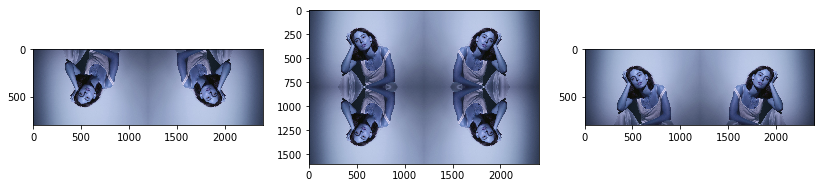

In [33]:
# 水平翻轉 (horizontal)
img_hflip = img[:,::-1,:]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]

# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

plt.figure(figsize=(14,14))

plt.subplot(131)
plt.imshow(vflip)
plt.subplot(132)
plt.imshow(img_flip)
plt.subplot(133)
plt.imshow(hflip)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.003779888153076172
INTER_CUBIC zoom cost 0.007634878158569336


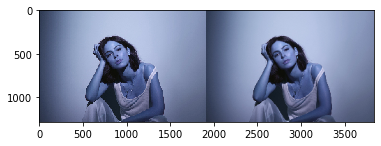

In [34]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy,interpolation= cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))
#plt.figsize((12,12))
plt.imshow(img_zoom)

## 平移幾何轉換

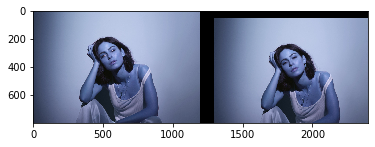

In [35]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))
plt.imshow(img_shift)

In [38]:
img.shape[1]

1199